# 1 Document Clustering
Student ID: 35224436 | Full name: Yiming Zhang

## Question 1 Expectation Maximisation

### Task I


#### Write mathematical formulations of the optimization functions of maximum likelihood estimation (MLE) for the document clustering model with complete data and incomplete data, respectively. Then briefly describe why MLE with incomplete data is hard to optimize.

##### <font color=red><b>Multiple documents MLE (complete data)</b></font>

For each document ${d_n}$, choose a cluster $k \in \{1, \dots, K\}$ by tossing a $K$-faced dice parameterized by $\boldsymbol{\varphi} = [\varphi_1,\dots, \varphi_K]$:
$$
p(z_n = k) = \varphi_k, \quad \sum_{k=1}^{K} \varphi_k = 1
$$
where $\varphi_k$ represents the prior probability that document $d_n$ belongs to cluster $k$.

Given the selected cluster $k$,
generate each word in the document independently from the word distribution $\boldsymbol{\mu}_k = [\mu_{k,w}]_{w \in \mathcal{A}}$:

$$
p(w \mid z_n = k) = \mu_{k,w}, \quad 
\sum_{w \in \mathcal{A}} \mu_{k,w} = 1
$$

Each $\boldsymbol{\mu}_k$ corresponds to the multinomial word distribution for cluster $k$.

Thus, the joint probability of a document $d$ and its cluster $k$ is:

$$
p(d, k) = p(k) \, p(d \mid k)
= \varphi_k \prod_{w \in \mathcal{A}} \mu_{k,w}^{\,c(w, d)}
$$

where $c(w, d)$ is the number of times word $w$ appears in document $d$.

Assume that in addition to the documents $D = \{{d_1, d_2, ..., d_N}\}$, each document $d_N$ has its own topic label $\{{k_1, k_2, ..., k_N}\}$. We can represent the joint probalitity as:

$$
p(d_1, k_1,...,d_N,k_N) = p(d_1, k_1) · p(d_2, k_2) · ... · p(d_N, k_N)
= \prod_{n=1}^{N} p(k_N)\,p(d_N \mid k_N)
$$

Therefore, the general form is:

$$
p(d_1, z_1, \dots, d_N, z_N)
= \prod_{n=1}^{N} \prod_{k=1}^{K}
\left(
\varphi_k
\prod_{w \in \mathcal{A}} 
\mu_{k,w}^{\,c(w, d_n)}
\right)^{z_{n,k}}
$$

where $z_{n,k} \in \{0,1\}$ is an indicator variable that equals 1 if document $d_n$ belongs to cluster $k$, and 0 otherwise.

##### <font color=red><b>Multiple documents MLE (incomplete data)</b></font>

In this case, we can only observe the document $d$, but we do not know which cluster $k$ it belongs to. The cluster assignment $k$ is therefore a latent variable. Hence, we marginalize over $k$ to eliminate this unobserved variable.

Therefore, we can represent the joint probability of a document $d$ as:

$$
p(d) = \sum_{k}p(d, k) = \sum_{k} \varphi_{k} · p(d \mid k)
= \sum_{k} (\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{\,c(w, d)})
$$

where $c(w, d)$ is the number of times word $w$ appears in document $d$.

Assume that in addition to the documents $D = \{{d_1, d_2, ..., d_N}\}$, $z_n$ is a latent variable. We can represent the joint probalitity as:

$$
p(d_1, \dots, d_N)
= \prod_{n=1}^{N} p(d_n)
= \prod_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k} = 1, d_n)
$$

Here, $z_{n,k}=1$ indicates that document $d_n$ belongs to cluster $k$, and $z_{n,k}=0$ otherwise.

Substituting the generative model, we obtain the general form:

$$
p(d_1, \dots, d_N) =
= \prod_{n=1}^{N} \sum_{k=1}^{K}
\left(
\varphi_k 
\prod_{w \in \mathcal{A}}
\mu_{k,w}^{\,c(w, d_n)}
\right)
$$

Taking the logarithm gives the incomplete-data log-likelihood  

$$
\ln {p(d_1, z_1, \dots, d_N, z_N)}
= \sum_{n=1}^{N} \ln{p(d_n)}
 = \sum_{n=1}^{N}
   \ln \,
      \sum_{k=1}^{K}
      \left(\varphi_k
      \prod_{w \in \mathcal{A}}
      \mu_{k,w}^{\,c(w,d_n)}\right)
$$

MLE with incomplete data is hard to optimize because the log-likelihood contains
a logarithm of a summation over hidden clusters.  
The latent variables $z_n$ are unobserved, so the parameters
$\varphi_k$ and $\mu_{k,w}$ are coupled inside the logarithm,
preventing closed-form analytical updates.

#### Briefly explain the high-level idea of the EM algorithm to find MLE parameter estimates.

Since the usual MLE on the incomplete-data log-likelihood is hard, EM tackles this by alternating two steps on a current parameter guess.

In the **E-step**, we compute the expected value of the complete-data log-likelihood with respect to the posterior distribution of the latent cluster assignments under the current parameter estimates $\boldsymbol{\theta}^{\text{old}}$. 

This gives the **Q function**, which forms the basis of the EM algorithm:

$$
Q(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text{old}}) 
= \sum_{n=1}^{N} \sum_{k=1}^{K} 
p(z_{n,k}=1 \mid d_n, \boldsymbol{\theta}^{\text{old}}) 
\ln p(z_{n,k}=1, d_n \mid \boldsymbol{\theta})
$$

Substituting the generative model of document clustering, we get:

$$
Q(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text{old}}) 
= \sum_{n=1}^{N} \sum_{k=1}^{K} 
\gamma(z_n, k)
\left(
\ln \varphi_k +
\sum_{w \in \mathcal{A}} c(w, d_n)\ln \mu_{k,w}
\right)
$$

where  

- $\boldsymbol{\theta} = (\boldsymbol{\varphi}, \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K)$  
  is the collection of model parameters.  
- $\gamma(z_n, k) = p(z_{n,k}=1 \mid d_n, \boldsymbol{\theta}^{\text{old}})$  
  represents the **responsibility** (posterior probability) that document $d_n$ belongs to cluster $k$.  
- $c(w, d_n)$ is the number of occurrences of word $w$ in document $d_n$.  

In the **M-step**, we maximize this $Q$ function with respect to $\boldsymbol{\theta}$, which yields the updated parameter estimates:

$$
\varphi_k^{\text{new}} = \frac{N_k}{N}, 
\quad 
N_k = \sum_{n=1}^{N}\gamma(z_n, k)
$$

$$
\mu_{k,w}^{\text{new}} =
\frac{\sum_{n=1}^{N}\gamma(z_n, k)c(w, d_n)}
     {\sum_{w'\in\mathcal{A}}\sum_{n=1}^{N}\gamma(z_n, k)c(w', d_n)}
$$

Each EM iteration alternates between estimating the posterior responsibilities (E-step) and maximizing the expected complete-data log-likelihood (M-step). This process guarantees that the incomplete-data log-likelihood **never decreases** across iterations.


### Task II
#### Problem Setup
Given a collection of documents $D = \{{d_1,d_2,...,d_N}\}$ with vocabulary $\mathcal{A}$, we want to cluster them into $K$ clusters.

#### Model Parameters
The parameters to learn are:
$$
\boldsymbol{\theta} := (\boldsymbol{\varphi}, \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K)
$$
where:
- **Mixing coefficients:** $\boldsymbol{\varphi} = (\varphi_1, \ldots, \varphi_K)$ with $\sum_{k=1}^K \varphi_k = 1$ and $\varphi_k \geq 0$

- **Word distributions:** $\boldsymbol{\mu}_k = (\mu_{k,w})_{w \in \mathcal{A}}$​ for cluster $k$, with $\sum_{w \in \mathcal{A}} \mu_{k,w} = 1$ and $\mu_{k,w} \geq 0$

#### Latent Variables

$z_n​=(z_{n,1}​,…,z_{n,K}​)$ where $z_{n,k}=1$ if document $d_n$​ belongs to cluster $k$, and 0 otherwise.

#### Notation

$c(w,d_n​) =$ count of word $w$ in document $d_n$

#### Derive process

First, random generate initial parameters: $\mu_{old}$ and $\varphi_{old}$.

##### E-step

In E-step, for every $d_n$ and every cluster $k$, compute the posterior probability:

$$
\gamma(z_n, k) = p(z_{n,k}=1 \mid d_n, \boldsymbol{\theta}^{\text{old}})
$$

According to the Bayes Rules:

$$
\gamma(z_n, k) = p(z_{n,k}=1 \mid d_n, \boldsymbol{\theta}^{\text{old}})
= \frac{p(z_n=k \mid \theta)\,p(d_n \mid z_n=k, \theta)}{\sum_{j=1}^{K}\,p(z_n=j \mid \theta)\,p(d_n \mid z_n=j, \theta)}
$$

Substituting $p(z_n=k \mid \theta)=\mu_{k}$ and $p(d_n \mid z_n=k, \theta)= \prod_{w \in \mathcal{A}} \mu_{k,w}^{\,c(w, d_n)}$,
we have **E-Step Update Rule**:


$$
\gamma(z_n, k) = \frac{\varphi_{old}\,\prod_{w \in \mathcal{A}}(\mu_{k,w}^{old})^{\,c(w, d_n)}}{\sum_{j=1}^{K}\,\varphi_{j}^{old}\,\prod_{w \in \mathcal{A}}(\mu_{j,w}^{old})^{c(w, d_n)}}
$$


In M-Step, we need maximize $Q(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text{old}})$ subject to:
$\sum_{k=1}^{K} \varphi_k = 1$ and $\sum_{w \in \mathcal{A}} \mu_{k,w} = 1$.

Form the Lagrangian:
$$
\mathcal{L} = Q(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text{old}}) + \lambda \left( \sum_{k=1}^{K} \varphi_k - 1 \right)
$$

Taking derivative with respect to $\varphi_k$​:

$$
\frac{\partial \mathcal{L}}{\partial \varphi_k} = \sum_{n=1}^{N} \gamma(z_n, k) \cdot \frac{1}{\varphi_k} + \lambda = 0
\Rightarrow \sum_{n=1}^{N} \gamma(z_n, k) = -\lambda \varphi_k
$$

Summing over $k$:

$$
\sum_{k=1}^{K} \sum_{n=1}^{N} \gamma(z_n, k) = -\lambda \sum_{k=1}^{K} \varphi_k = -\lambda
$$

Since $\sum_{k=1}^{K} \gamma(z_n, k) = 1$, we have $\sum_{k=1}^{K} \sum_{n=1}^{N} \gamma(z_n, k) = N$.

Therefore: $\lambda = -N$. Substituting back we have **M-Step Update Rule for $\varphi_k$**:

$$
\varphi_k^{\text{new}} = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_n, k) = \frac{N_k}{N}
$$

where $N_k := \sum_{n=1}^{N} \gamma(z_n, k)$ is the effective number of documents assigned to cluster $k$.


##### M-step
Then we need derive the updating rule of Word Distributions $\mu_{k,w}$:

For each cluster $k$, form the Lagrangian:

$$
\mathcal{L}_k = Q(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text{old}}) + \lambda_k \left( \sum_{w \in \mathcal{A}} \mu_{k,w} - 1 \right)
$$

Taking derivative with respect to $\mu_{k,w}$:

$$
\frac{\partial \mathcal{L}_k}{\partial \mu_{k,w}} = \sum_{n=1}^{N} \gamma(z_n, k) \cdot \frac{c(w, d_n)}{\mu_{k,w}} + \lambda_k = 0
$$
$$
\Rightarrow \sum_{n=1}^{N} \gamma(z_n, k) \cdot c(w, d_n) = -\lambda_k \mu_{k,w}
$$

Summing over $w \in \mathcal{A}$:

$$
\sum_{w \in \mathcal{A}} \sum_{n=1}^{N} \gamma(z_n, k) \cdot c(w, d_n) = -\lambda_k \sum_{w \in \mathcal{A}} \mu_{k,w} = -\lambda_k
$$

The left side equals:

$$
\sum_{n=1}^{N} \gamma(z_n, k) \sum_{w \in \mathcal{A}} c(w, d_n) = \sum_{n=1}^{N} \gamma(z_n, k) \cdot |d_n|
$$

where $|d_n|$ is the total word count in document $d_n$.

For simplicity, let:

$$
\lambda_k = -\sum_{w' \in \mathcal{A}} \sum_{n=1}^{N} \gamma(z_n, k) \cdot c(w', d_n)
$$

Then we get the **M-Step Update Rule for $\mu_{k,w}$**:

$$
\mu_{k,w}^{\text{new}} = \frac{\sum_{n=1}^{N} \gamma(z_n, k) \cdot c(w, d_n)}{\sum_{w' \in \mathcal{A}} \sum_{n=1}^{N} \gamma(z_n, k) \cdot c(w', d_n)}
$$

##### Assignment (After Convergence):
Assign document $d_n$ to cluster:
$$
k^* = \arg\max_{k} \gamma(z_n, k)
$$



### Task III

#### Load File

In [44]:
import pandas as pd 
import numpy as np

with open('/Users/2m/Documents/Monash/FIT5201/Assignment/ML_ASS/ASS2/Dataset_S2_2025/Task2A.txt', 'r') as file:
    text = file.readlines()

#### Data preprocessing

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

all([length == 2 for length in [len(line.split('\t')) for line in text]])
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
docs.head()

min_freq = 10
feature_options = []
for i in range(min_freq):
    cv = CountVectorizer(
        lowercase=True, stop_words="english", min_df=i + 1
    )  # min_df: low frequency words
    features = cv.fit_transform(raw_documents=articles)
    feature_options += [features]
    print(len(cv.get_feature_names_out()))

features = feature_options[4]  # going with min_freq = 5
features.shape

30288
16806
12153
9724
8094
6986
6182
5562
5063
4593


(2373, 8094)

### Task IV

In [46]:
from scipy.stats import multivariate_normal
import numpy as np

class EM:
    def __init__(self, K, tau_max=200, epsilon=0.01, random_state=None, hardEM=False):
        self.K = K  # number of EM clusters
        self.tau_max = tau_max  # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        self.random_state = random_state
        self.hardEM = hardEM
        np.random.seed(self.random_state)

    def get_params(self, deep=False):
        return {
            "K": self.K,
            "tau_max": self.tau_max,
            "epsilon": self.epsilon,
            "random_state": self.random_state,
            "hardEM": self.hardEM,
        }

    def __str__(self):
        params = self.get_params()
        return "EM({0})".format(
            ",".join(["=".join([key, str(params[key])]) for key in params.keys()])
        )

    def __repr__(self):
        return self.__str__()

    def compute_gamma(self, X, phi, mu):
        """
        Compute the posterior probability of each document belonging to each cluster
        """
        X = X.toarray()
        N, V = X.shape
        K = self.K
        r = np.zeros((N, K))
        for n in range(N):  # for each document
            doc = X[n]
            scores = np.zeros(K)
            for k in range(K):  # for each cluster
                log_prob = np.log(phi[k] + 1e-12)  # avoid log(0)
                for w in range(V):
                    if doc[w] > 0:
                        log_prob += doc[w] * np.log(mu[k, w] + 1e-12)
                scores[k] = log_prob

            # softmax
            max_score = np.max(scores)
            exp_scores = np.exp(scores - max_score)  # avoid overflow
            r[n] = exp_scores / np.sum(exp_scores)
        return r  # shape: (N, K)

    def update_phi(self, gamma, phi, N):
        """
        Update the mixing coefficients
        """
        for k in range(self.K):
            total = 0.0
            for n in range(N):
                total += gamma[n][k]
            phi[k] = total / N
        return phi

    def update_mu(self, X, gamma, N, V):
        """
        Update the word distributions
        """
        documents = X.toarray()
        new_mu = np.zeros((self.K, V))  # new mu for each cluster
        for k in range(self.K):  # for each cluster
            total = 0.0
            for n in range(N):  # for each document
                doc = documents[n]
                for w in range(V):  # for each word
                    count = doc[w]
                    new_mu[k][w] += gamma[n][k] * count
                    total += gamma[n][k] * count # accumulate the total count of words in cluster k
            # normalize
            for w in range(V):
                if total > 0:
                    new_mu[k][w] /= total

        return new_mu

    def fit(self, X, verbose=False):
        N, V = X.shape  # N is the number of documents, V is the number of words

        # initialize phi with equal probability
        self.phi = np.full(self.K, 1 / self.K)

        # initialize mu randomly and normalize
        self.mu = np.random.rand(self.K, V)
        self.mu /= np.sum(self.mu, axis=1, keepdims=True)

        # initialize gamma as 0, calculate in E-step
        r = np.zeros((N, self.K))

        terminate = False
        tau = 0

        # fitting loop - we iteratively take E and M steps until the termination criterion is met.
        Mu_hat_old = (
            self.mu
        )  # Mu_hat_old is used to store the last iteration value for mu_hat
        while not terminate:
            if verbose:
                print("iteration {0}".format(tau))
            # E step:
            r = self.compute_gamma(X, self.phi, self.mu)

            # if hardEM, set r to 0 or 1
            if self.hardEM:
                r = np.where(r == r.max(axis=1, keepdims=True), 1, 0)

            # M step
            self.phi = self.update_phi(r, self.phi, N)
            self.mu = self.update_mu(X, r, N, V)

            # increase iteration counter
            tau += 1

            # check termination condition
            terminate = (tau == self.tau_max) or np.allclose(
                self.mu, Mu_hat_old, rtol=self.epsilon
            )
            # record the means (neccessary for checking the termination criteria)
            Mu_hat_old = self.mu

        if verbose:
            print(f"Converged in {tau} iterations")

        return self

    def predict_proba(self, x):
        r = self.compute_gamma(x, self.phi, self.mu)
        return r

    def predict(self, x):
        probs = self.predict_proba(x)
        preds = np.argmax(probs, axis=1)
        return preds

### Task V
Set the number of clusters K=4, and run the hard clustering (using hard-EM) and soft clustering (using soft-EM) on the provided data

In [47]:
softEM = EM(K=4, tau_max=30, hardEM=False)
softEM.fit(features, verbose=True)
print("======== Predicting the cluster for each document using soft-EM: ========")
preds_soft = softEM.predict(features)
preds_soft

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
Converged in 30 iterations
======== Predicting the cluster for each document using soft-EM: ========


array([1, 1, 1, ..., 1, 3, 2])

In [48]:
hardEM = EM(K=4, tau_max=30, hardEM=True)
hardEM.fit(features, verbose=True)
print("======== Predicting the cluster for each document using hard-EM: ========")
preds_hard = hardEM.predict(features)
preds_hard

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
Converged in 14 iterations
======== Predicting the cluster for each document using hard-EM: ========


array([2, 2, 2, ..., 2, 3, 2])

### Task VI

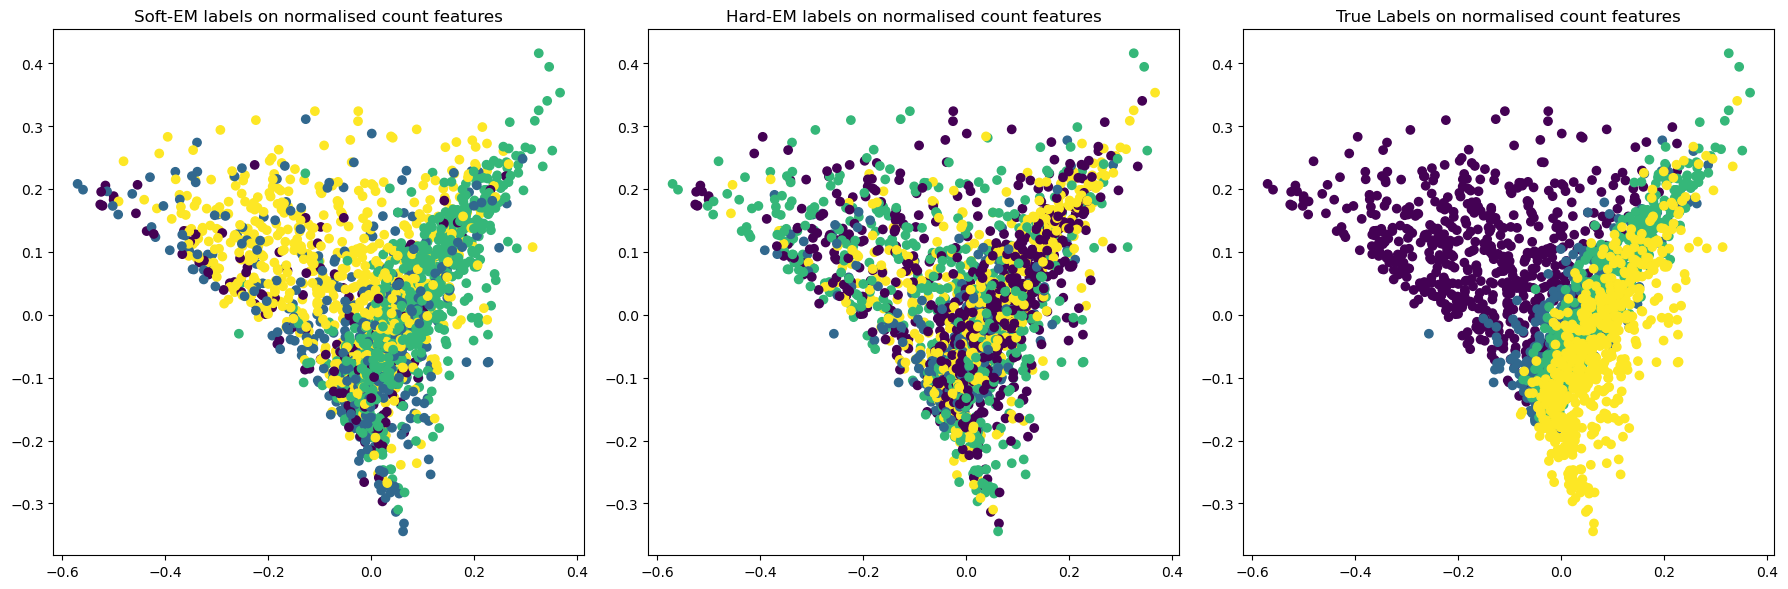

In [49]:
## perform pca
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

l2_norm = Normalizer(norm='l2')
features_normalised = l2_norm.fit_transform(features.toarray())

pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_normalised)

_, axs = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)
## plot the soft-EM outcome
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=preds_soft)
axs[0].set_title('Soft-EM labels on normalised count features')

## plot the hard-EM outcome
axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=preds_hard)
axs[1].set_title('Hard-EM labels on normalised count features')

## plot the original data
axs[2].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[2].set_title('True Labels on normalised count features')
plt.show()


#### Discussion: Soft-EM vs Hard-EM (TODO)
